<a href="https://colab.research.google.com/github/Souvik0651/Zomato-Restaurant-Clustering-and-sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_and_sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone project4- Unsupervised/Zomato Restaurant names and Metadata.csv')

In [130]:
df.head(2)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [132]:
df.drop('Collections',axis=1,inplace=True)

In [133]:
df.drop(df[df.Timings.isnull()].index,inplace=True)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      104 non-null    object
 1   Links     104 non-null    object
 2   Cost      104 non-null    object
 3   Cuisines  104 non-null    object
 4   Timings   104 non-null    object
dtypes: object(5)
memory usage: 4.9+ KB


In [135]:
df.Name.unique()

array(['Beyond Flavours', 'Paradise', 'Flechazo',
       'Shah Ghouse Hotel & Restaurant', 'Over The Moon Brew Company',
       "The Fisherman's Wharf", 'eat.fit', 'Shah Ghouse Spl Shawarma',
       'Hyper Local', 'Cream Stone', "Sardarji's Chaats & More",
       'Barbeque Nation', 'Absolute Sizzlers',
       'The Lal Street - Bar Exchange', "AB's - Absolute Barbecues",
       'KFC', 'NorFest - The Dhaba', 'Hotel Zara Hi-Fi',
       '10 Downing Street', 'Pakwaan Grand', '13 Dhaba',
       "Jonathan's Kitchen - Holiday Inn Express & Suites", 'B-Dubs',
       'Amul', 'SKYHY', 'Tiki Shack', 'Mustang Terrace Lounge',
       "3B's - Buddies, Bar & Barbecue", 'Behrouz Biryani',
       'Hunger Maggi Point', 'Pista House', 'Marsala Food Company',
       'Club Rogue', 'Mazzo - Marriott Executive Apartments',
       'Green Bawarchi Restaurant', 'Banana Leaf Multicuisine Restaurant',
       'Kritunga Restaurant', 'The Glass Onion', 'Deli 9 Bistro',
       'Frio Bistro', 'Karachi Bakery', 'Karachi

In [136]:
df.Links.unique()

array(['https://www.zomato.com/hyderabad/beyond-flavours-gachibowli',
       'https://www.zomato.com/hyderabad/paradise-gachibowli',
       'https://www.zomato.com/hyderabad/flechazo-gachibowli',
       'https://www.zomato.com/hyderabad/shah-ghouse-hotel-restaurant-gachibowli',
       'https://www.zomato.com/hyderabad/over-the-moon-brew-company-gachibowli',
       'https://www.zomato.com/hyderabad/the-fishermans-wharf-gachibowli',
       'https://www.zomato.com/hyderabad/eat-fit-gachibowli',
       'https://www.zomato.com/hyderabad/shah-ghouse-spl-shawarma-gachibowli',
       'https://www.zomato.com/hyderabad/hyper-local-gachibowli',
       'https://www.zomato.com/hyderabad/cream-stone-gachibowli',
       'https://www.zomato.com/hyderabad/sardarjis-chaats-more-gachibowli',
       'https://www.zomato.com/hyderabad/barbeque-nation-gachibowli',
       'https://www.zomato.com/hyderabad/absolute-sizzlers-gachibowli',
       'https://www.zomato.com/hyderabad/the-lal-street-bar-exchange-gachi

In [137]:
df.drop('Links',axis='columns',inplace=True)

In [138]:
df.Cost.unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '700', '900', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [139]:
df.Cost=df.Cost.str.replace(',','').astype('int')

In [140]:
df.Cuisines.unique()

array(['Chinese, Continental, Kebab, European, South Indian, North Indian',
       'Biryani, North Indian, Chinese',
       'Asian, Mediterranean, North Indian, Desserts',
       'Biryani, North Indian, Chinese, Seafood, Beverages',
       'Asian, Continental, North Indian, Chinese, Mediterranean',
       'Seafood, Goan, North Indian, Continental, Asian',
       'Healthy Food, North Indian, Continental, South Indian',
       'Lebanese', 'American, Chinese, North Indian, Kebab, South Indian',
       'Ice Cream, Desserts', 'Street Food, North Indian, Fast Food',
       'Mediterranean, North Indian, Kebab, BBQ',
       'Continental, American, Chinese',
       'North Indian, Italian, Finger Food',
       'European, Mediterranean, North Indian', 'Burger, Fast Food',
       'North Indian', 'Chinese, North Indian',
       'North Indian, Chinese, Continental',
       'North Indian, Chinese, Biryani',
       'North Indian, Japanese, Italian, Salad, Sushi', 'American',
       'Continental', 'Mex

In [141]:
df.Cuisines.value_counts()

North Indian, Chinese                                   4
North Indian                                            3
North Indian, Biryani, Chinese                          2
Fast Food                                               2
Biryani, North Indian, Chinese                          2
                                                       ..
Andhra, Biryani, Hyderabadi, North Indian               1
Biryani, South Indian, North Indian, Chinese, Andhra    1
Italian, North Indian, South Indian, Asian              1
North Indian, Fast Food                                 1
Thai, Asian, Chinese, Malaysian                         1
Name: Cuisines, Length: 91, dtype: int64

In [142]:
cuis=df.Cuisines.str.split(', ')
cuis

0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 104, dtype: object

In [143]:
cuis_dict={}
for names in cuis:
  for name in names:
    if name in cuis_dict:
      cuis_dict[name]+=1
    else:
      cuis_dict[name]=1
print(cuis_dict)
cuis_df=pd.DataFrame(cuis_dict.items(),columns=['cuisines','no of restaurants'])

{'Chinese': 43, 'Continental': 21, 'Kebab': 6, 'European': 4, 'South Indian': 8, 'North Indian': 60, 'Biryani': 16, 'Asian': 15, 'Mediterranean': 5, 'Desserts': 13, 'Seafood': 4, 'Beverages': 5, 'Goan': 1, 'Healthy Food': 1, 'Lebanese': 1, 'American': 6, 'Ice Cream': 2, 'Street Food': 2, 'Fast Food': 15, 'BBQ': 2, 'Italian': 14, 'Finger Food': 2, 'Burger': 5, 'Japanese': 2, 'Salad': 5, 'Sushi': 4, 'Mexican': 1, 'Mughlai': 6, 'Bakery': 7, 'Juices': 1, 'Arabian': 2, 'Andhra': 5, 'Hyderabadi': 4, 'Cafe': 6, 'Spanish': 1, 'Wraps': 1, 'Thai': 3, 'Indonesian': 1, 'Modern Indian': 2, 'Momos': 4, 'Pizza': 1, 'North Eastern': 1, 'Mithai': 1, 'Malaysian': 1}


In [144]:
cuis_dict.keys()

dict_keys(['Chinese', 'Continental', 'Kebab', 'European', 'South Indian', 'North Indian', 'Biryani', 'Asian', 'Mediterranean', 'Desserts', 'Seafood', 'Beverages', 'Goan', 'Healthy Food', 'Lebanese', 'American', 'Ice Cream', 'Street Food', 'Fast Food', 'BBQ', 'Italian', 'Finger Food', 'Burger', 'Japanese', 'Salad', 'Sushi', 'Mexican', 'Mughlai', 'Bakery', 'Juices', 'Arabian', 'Andhra', 'Hyderabadi', 'Cafe', 'Spanish', 'Wraps', 'Thai', 'Indonesian', 'Modern Indian', 'Momos', 'Pizza', 'North Eastern', 'Mithai', 'Malaysian'])

In [145]:
cuis_df.head(27)

,cuisines,no of restaurants
0,Chinese,43
1,Continental,21
2,Kebab,6
3,European,4
4,South Indian,8
5,North Indian,60
6,Biryani,16
7,Asian,15
8,Mediterranean,5
9,Desserts,13


In [146]:
cuis_df.sort_values(by='no of restaurants',ascending=False,inplace=True)

In [147]:
cuis_df.reset_index(drop=True)

,cuisines,no of restaurants
0,North Indian,60
1,Chinese,43
2,Continental,21
3,Biryani,16
4,Fast Food,15
5,Asian,15
6,Italian,14
7,Desserts,13
8,South Indian,8
9,Bakery,7


In [148]:
print('Top 10 Cuisines:\n',cuis_df[0:10])

Top 10 Cuisines:
         cuisines  no of restaurants
5   North Indian                 60
0        Chinese                 43
1    Continental                 21
6        Biryani                 16
18     Fast Food                 15
7          Asian                 15
20       Italian                 14
9       Desserts                 13
4   South Indian                  8
28        Bakery                  7


Text(0.5, 1.0, 'Cuisines served by Restaurants')

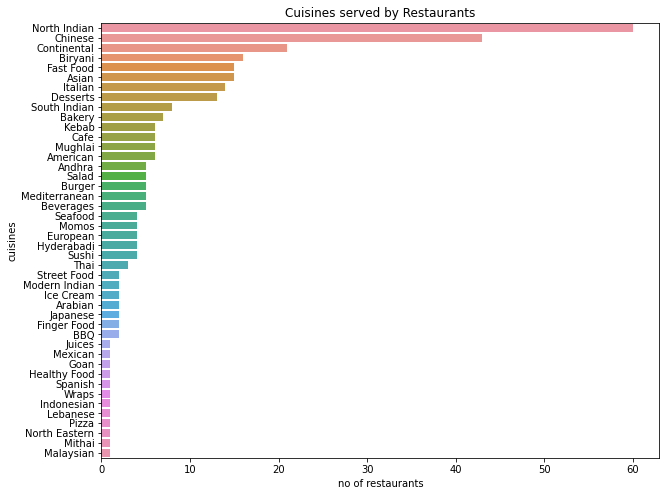

In [149]:
plt.rcParams['figure.figsize']=(10,8)
sns.barplot(y='cuisines',x='no of restaurants',data=cuis_df)
plt.title('Cuisines served by Restaurants')

In [150]:
df.columns

Index(['Name', 'Cost', 'Cuisines', 'Timings'], dtype='object')

In [151]:
high_cost_rest=df[['Name','Cost']].sort_values(by='Cost',ascending=False).head(10)
low_cost_rest=df[['Name','Cost']].sort_values(by='Cost',ascending=True).head(10)
# df.groupby(['Name'])['Cost'].sum().sort_values(ascending=False)

Text(0, 0.5, 'Restaurant Name')

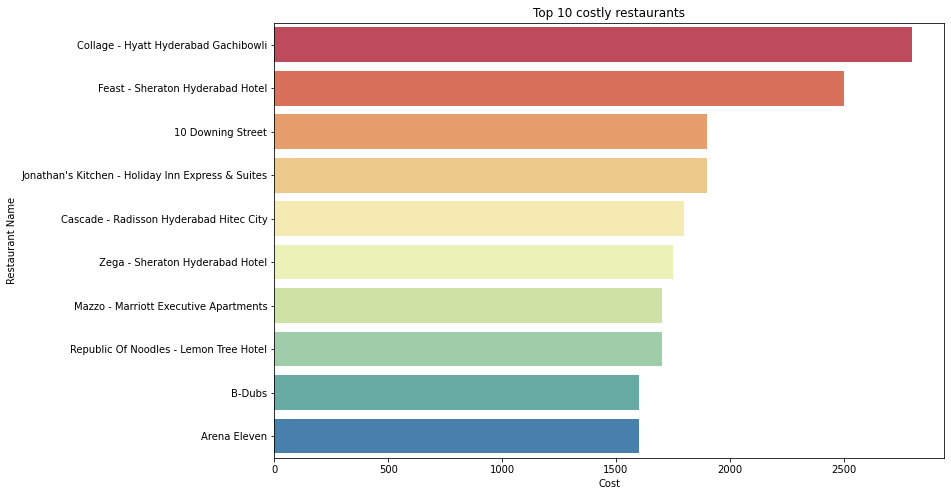

In [152]:
plt.figure(figsize=(12,8))
sns.barplot(y='Name',x='Cost',data=high_cost_rest,palette='Spectral')
plt.title('Top 10 costly restaurants')
plt.ylabel('Restaurant Name')

Text(0, 0.5, 'Restaurant Name')

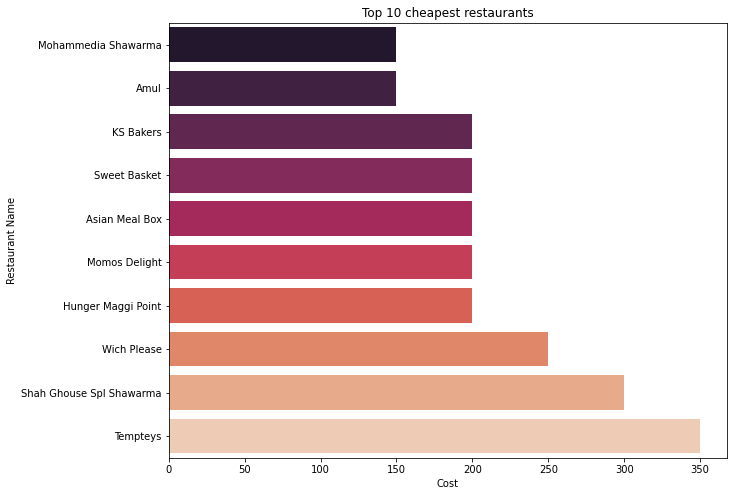

In [153]:
sns.barplot(y='Name',x='Cost',data=low_cost_rest,palette='rocket')
plt.title('Top 10 cheapest restaurants')
plt.ylabel('Restaurant Name')

In [154]:
df.Timings.unique()

array(['12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)', '11 AM to 11 PM',
       '11:30 AM to 4:30 PM, 6:30 PM to 11 PM', '12 Noon to 2 AM',
       '12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12noon to 12midnight (Fri-Sat)',
       '12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30PM (Mon, Tue, Wed, Thu, Sun), 12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 12Midnight (Fri-Sat)',
       '7 AM to 10 PM', '12 Noon to 12 Midnight',
       '10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri-Sun)',
       '12 Noon to 3:30 PM, 7 PM to 10:30 PM',
       '12 Noon to 3:30 PM, 6:30 PM to 11:30 PM', '11:30 AM to 1 AM',
       '12noon to 12midnight (Mon-Sun)',
       '12 Noon to 4:30 PM, 6:30 PM to 11:30 PM', '12 Noon to 10:30 PM',
       '12 Noon to 11 PM', '12:30 PM to 10 PM (Tue-Sun), Mon Closed',
       '11:30 AM to 3 PM, 7 PM to 11 PM',
       '11am to 11:30pm (Mon, Tue, Wed, Thu, Sun), 11am to 12midnight (Fri-Sat)',
       '10 AM to 5 AM',
       '12 Noon to 12 Midnight (Mon-Thu, Sun), 12 Noon to 1 AM (Fri-S

In [155]:
df.drop('Timings',axis='columns',inplace=True)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 104
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      104 non-null    object
 1   Cost      104 non-null    int64 
 2   Cuisines  104 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.2+ KB


In [157]:
cuis_1=pd.DataFrame(columns=cuis_dict.keys())

In [158]:
df=pd.concat([df,cuis_1])

In [159]:
no_of_cuisines=[]
for names in cuis:
  no_of_cuisines.append(len(names))
print(no_of_cuisines)

[6, 3, 4, 5, 5, 5, 4, 1, 5, 2, 3, 4, 3, 3, 3, 2, 1, 2, 3, 3, 1, 5, 1, 2, 3, 1, 5, 3, 2, 1, 5, 3, 2, 4, 3, 5, 4, 4, 3, 4, 3, 3, 3, 4, 4, 3, 4, 3, 3, 2, 3, 3, 3, 1, 2, 4, 2, 2, 3, 4, 4, 3, 3, 2, 4, 4, 2, 3, 3, 5, 3, 2, 3, 3, 2, 1, 4, 2, 4, 3, 2, 5, 2, 4, 1, 2, 4, 2, 2, 1, 4, 5, 2, 5, 2, 3, 2, 1, 2, 2, 2, 3, 1, 4]


In [160]:
df.columns

Index(['Name', 'Cost', 'Cuisines', 'Chinese', 'Continental', 'Kebab',
       'European', 'South Indian', 'North Indian', 'Biryani', 'Asian',
       'Mediterranean', 'Desserts', 'Seafood', 'Beverages', 'Goan',
       'Healthy Food', 'Lebanese', 'American', 'Ice Cream', 'Street Food',
       'Fast Food', 'BBQ', 'Italian', 'Finger Food', 'Burger', 'Japanese',
       'Salad', 'Sushi', 'Mexican', 'Mughlai', 'Bakery', 'Juices', 'Arabian',
       'Andhra', 'Hyderabadi', 'Cafe', 'Spanish', 'Wraps', 'Thai',
       'Indonesian', 'Modern Indian', 'Momos', 'Pizza', 'North Eastern',
       'Mithai', 'Malaysian'],
      dtype='object')

In [161]:
df.head(5)

,Name,Cost,Cuisines,Chinese,Continental,Kebab,European,South Indian,North Indian,Biryani,...,Spanish,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian
0,Beyond Flavours,800.0,"Chinese, Continental, Kebab, European, South I...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Paradise,800.0,"Biryani, North Indian, Chinese",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Flechazo,1300.0,"Asian, Mediterranean, North Indian, Desserts",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Shah Ghouse Hotel & Restaurant,800.0,"Biryani, North Indian, Chinese, Seafood, Bever...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Over The Moon Brew Company,1200.0,"Asian, Continental, North Indian, Chinese, Med...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
df['no of cuisnes']=no_of_cuisines


In [163]:
df.head(2)

,Name,Cost,Cuisines,Chinese,Continental,Kebab,European,South Indian,North Indian,Biryani,...,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian,no of cuisnes
0,Beyond Flavours,800.0,"Chinese, Continental, Kebab, European, South I...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,Paradise,800.0,"Biryani, North Indian, Chinese",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [164]:
# iterating for every row in the dataframe
for i, row in df.iterrows():
  # and for every row we iterate over the new columns only
  for column in list(df.columns):
      if column not in ['Name','Cost','Cuisines','no of cuisnes']:
        # and check if the column is in the list of cuisines available for that row
        if column in row['Cuisines']:
          #then assign it as 1 else 0
          df.loc[i,column] = 1
        else:
          df.loc[i,column] = 0

In [165]:
df

,Name,Cost,Cuisines,Chinese,Continental,Kebab,European,South Indian,North Indian,Biryani,...,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian,no of cuisnes
0,Beyond Flavours,800.0,"Chinese, Continental, Kebab, European, South I...",1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,6
1,Paradise,800.0,"Biryani, North Indian, Chinese",1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,3
2,Flechazo,1300.0,"Asian, Mediterranean, North Indian, Desserts",0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4
3,Shah Ghouse Hotel & Restaurant,800.0,"Biryani, North Indian, Chinese, Seafood, Bever...",1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,5
4,Over The Moon Brew Company,1200.0,"Asian, Continental, North Indian, Chinese, Med...",1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,IndiBlaze,600.0,"Fast Food, Salad",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
101,Sweet Basket,200.0,"Bakery, Mithai",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
102,Angaara Counts 3,500.0,"North Indian, Biryani, Chinese",1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,3
103,Wich Please,250.0,Fast Food,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [166]:
df.drop('Cuisines',axis='columns',inplace=True)

In [167]:
df1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone project4- Unsupervised/Zomato Restaurant reviews.csv')

In [168]:
df1.head(2)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0


In [169]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [170]:
df1=df1.dropna()

In [171]:
df1.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [172]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Reviewer    9955 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9955 non-null   object
 4   Metadata    9955 non-null   object
 5   Time        9955 non-null   object
 6   Pictures    9955 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.2+ KB


In [173]:
df1.Restaurant.unique()

array(['Beyond Flavours', 'Paradise', 'Flechazo',
       'Shah Ghouse Hotel & Restaurant', 'Over The Moon Brew Company',
       "The Fisherman's Wharf", 'eat.fit', 'Shah Ghouse Spl Shawarma',
       'Hyper Local', 'Cream Stone', "Sardarji's Chaats & More",
       'Barbeque Nation', 'Absolute Sizzlers',
       'The Lal Street - Bar Exchange', "AB's - Absolute Barbecues",
       'KFC', 'NorFest - The Dhaba', 'Hotel Zara Hi-Fi',
       '10 Downing Street', 'Pakwaan Grand', '13 Dhaba',
       "Jonathan's Kitchen - Holiday Inn Express & Suites", 'B-Dubs',
       'Amul', 'SKYHY', 'Tiki Shack', 'Mustang Terrace Lounge',
       "3B's - Buddies, Bar & Barbecue", 'Behrouz Biryani',
       'Hunger Maggi Point', 'Pot Pourri', 'Pista House',
       'Marsala Food Company', 'Club Rogue',
       'Mazzo - Marriott Executive Apartments',
       'Green Bawarchi Restaurant', 'Banana Leaf Multicuisine Restaurant',
       'Kritunga Restaurant', 'The Glass Onion', 'Deli 9 Bistro',
       'Frio Bistro', 'Kara

In [174]:
df1.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [175]:
df1.Reviewer.unique()

array(['Rusha Chakraborty', 'Anusha Tirumalaneedi', 'Ashok Shekhawat',
       ..., 'Ramandeep', 'Nayana Shanbhag', 'Bhargava Krishna'],
      dtype=object)

In [176]:
df1.Review.unique()

array(['The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.',
       'Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service',
       'A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.',
       ...,
       'Bad rating is mainly because of "Chicken Bone found in Veg food" and is not acceptable for a Vegetarian.\n\nTo satiate Cravings for chinese food we headed to Chinese Pavilion and there was also a voucher available in Little app for Luncheon tray for Rs 310 (Veg) [well do not bother for the voucher as the price for Veg Luncheon tray is Rs 275/- + taxes in the restaurant itself).\n\nThe am

In [177]:
df1.Rating.unique()
df1.Rating.value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [178]:
df1=df1.drop(df1.loc[df1.Rating=='Like'].index)

In [179]:
df1['Rating']=df1.Rating.astype('float')

In [180]:
Rating=df1.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Top rating hotels')

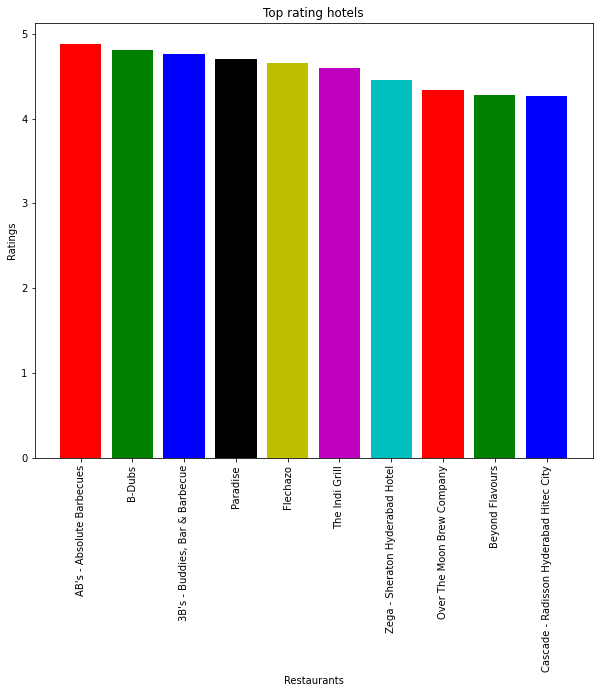

In [181]:
top_10=Rating.iloc[:10]
x=top_10.index.to_list()
y=top_10.to_list()
plt.bar(x,y,color='rgbkymc')
plt.xticks(rotation=90)
plt.xlabel('Restaurants')
plt.ylabel('Ratings')
plt.title('Top rating hotels')

In [182]:
top_10

Restaurant
AB's - Absolute Barbecues                  4.88
B-Dubs                                     4.81
3B's - Buddies, Bar & Barbecue             4.76
Paradise                                   4.70
Flechazo                                   4.66
The Indi Grill                             4.60
Zega - Sheraton Hyderabad Hotel            4.45
Over The Moon Brew Company                 4.34
Beyond Flavours                            4.28
Cascade - Radisson Hyderabad Hitec City    4.26
Name: Rating, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Lowest rating hotels')

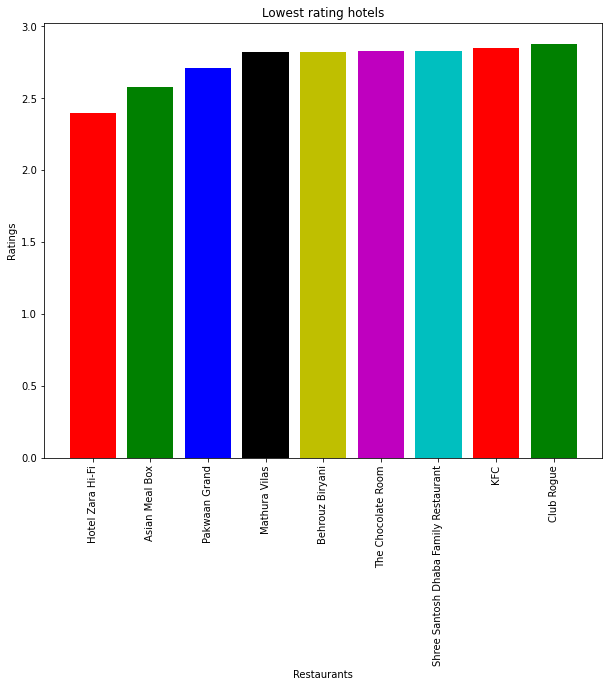

In [183]:
bottom_10=Rating.iloc[:-10:-1]
x=bottom_10.index.to_list()
y=bottom_10.to_list()
plt.bar(x,y,color='rgbkymc')
plt.xticks(rotation=90)
plt.xlabel('Restaurants')
plt.ylabel('Ratings')
plt.title('Lowest rating hotels')

In [184]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9954 non-null   object 
 1   Reviewer    9954 non-null   object 
 2   Review      9954 non-null   object 
 3   Rating      9954 non-null   float64
 4   Metadata    9954 non-null   object 
 5   Time        9954 non-null   object 
 6   Pictures    9954 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 622.1+ KB


In [185]:
df1.Metadata.unique()

array(['1 Review , 2 Followers', '3 Reviews , 2 Followers',
       '2 Reviews , 3 Followers', ..., '65 Reviews , 423 Followers',
       '13 Reviews , 144 Followers', '472 Reviews , 1302 Followers'],
      dtype=object)

In [186]:
meta=df1.Metadata.str.split(expand=True)
meta_df=meta[[0,3]]
meta_df.columns=['Reviews','Followers']
meta_df

,Reviews,Followers
0,1,2
1,3,2
2,2,3
3,1,1
4,3,2
...,...,...
9995,53,54
9996,2,53
9997,65,423
9998,13,144


In [187]:
df1=pd.concat([df1,meta_df],axis=1)
df1.drop('Metadata',axis=1,inplace=True)
df1.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0,1,2
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0,3,2
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0,2,3
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0,1,1
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0,3,2


In [188]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9954 non-null   object 
 1   Reviewer    9954 non-null   object 
 2   Review      9954 non-null   object 
 3   Rating      9954 non-null   float64
 4   Time        9954 non-null   object 
 5   Pictures    9954 non-null   int64  
 6   Reviews     9954 non-null   object 
 7   Followers   8380 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 699.9+ KB


In [189]:
df1=df1.fillna(0)

In [190]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9954 non-null   object 
 1   Reviewer    9954 non-null   object 
 2   Review      9954 non-null   object 
 3   Rating      9954 non-null   float64
 4   Time        9954 non-null   object 
 5   Pictures    9954 non-null   int64  
 6   Reviews     9954 non-null   object 
 7   Followers   9954 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 699.9+ KB


In [191]:
df1['Reviews']=df1.Reviews.astype('int')
df1.Followers=df1.Followers.astype('int')

In [192]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9954 non-null   object 
 1   Reviewer    9954 non-null   object 
 2   Review      9954 non-null   object 
 3   Rating      9954 non-null   float64
 4   Time        9954 non-null   object 
 5   Pictures    9954 non-null   int64  
 6   Reviews     9954 non-null   int64  
 7   Followers   9954 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 699.9+ KB


In [193]:
df1.drop('Time',axis=1,inplace=True)

In [194]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9954 non-null   object 
 1   Reviewer    9954 non-null   object 
 2   Review      9954 non-null   object 
 3   Rating      9954 non-null   float64
 4   Pictures    9954 non-null   int64  
 5   Reviews     9954 non-null   int64  
 6   Followers   9954 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 622.1+ KB


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 104
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           104 non-null    object 
 1   Cost           104 non-null    float64
 2   Chinese        104 non-null    object 
 3   Continental    104 non-null    object 
 4   Kebab          104 non-null    object 
 5   European       104 non-null    object 
 6   South Indian   104 non-null    object 
 7   North Indian   104 non-null    object 
 8   Biryani        104 non-null    object 
 9   Asian          104 non-null    object 
 10  Mediterranean  104 non-null    object 
 11  Desserts       104 non-null    object 
 12  Seafood        104 non-null    object 
 13  Beverages      104 non-null    object 
 14  Goan           104 non-null    object 
 15  Healthy Food   104 non-null    object 
 16  Lebanese       104 non-null    object 
 17  American       104 non-null    object 
 18  Ice Cream 

In [196]:
avg_rating=df1.groupby(['Restaurant'])['Rating'].mean().reset_index()
avg_rating.rename(columns={'Restaurant':'Name'},inplace=True)
avg_rating.sort_values(by='Rating',ascending = False).head()

,Name,Rating
3,AB's - Absolute Barbecues,4.88
11,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76
67,Paradise,4.70
35,Flechazo,4.66


In [197]:
avg_rating

,Name,Rating
0,10 Downing Street,3.80
1,13 Dhaba,3.48
2,"3B's - Buddies, Bar & Barbecue",4.76
3,AB's - Absolute Barbecues,4.88
4,Absolute Sizzlers,3.62
...,...,...
95,Urban Asia - Kitchen & Bar,3.65
96,Yum Yum Tree - The Arabian Food Court,3.56
97,Zega - Sheraton Hyderabad Hotel,4.45
98,Zing's Northeast Kitchen,3.65


In [198]:
rest_rating=df.merge(avg_rating,on="Name",how='left')

In [199]:
rest_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 103
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           104 non-null    object 
 1   Cost           104 non-null    float64
 2   Chinese        104 non-null    object 
 3   Continental    104 non-null    object 
 4   Kebab          104 non-null    object 
 5   European       104 non-null    object 
 6   South Indian   104 non-null    object 
 7   North Indian   104 non-null    object 
 8   Biryani        104 non-null    object 
 9   Asian          104 non-null    object 
 10  Mediterranean  104 non-null    object 
 11  Desserts       104 non-null    object 
 12  Seafood        104 non-null    object 
 13  Beverages      104 non-null    object 
 14  Goan           104 non-null    object 
 15  Healthy Food   104 non-null    object 
 16  Lebanese       104 non-null    object 
 17  American       104 non-null    object 
 18  Ice Cream 

In [200]:
rest_rating=rest_rating.fillna(0)

In [201]:
rest_rating.columns

Index(['Name', 'Cost', 'Chinese', 'Continental', 'Kebab', 'European',
       'South Indian', 'North Indian', 'Biryani', 'Asian', 'Mediterranean',
       'Desserts', 'Seafood', 'Beverages', 'Goan', 'Healthy Food', 'Lebanese',
       'American', 'Ice Cream', 'Street Food', 'Fast Food', 'BBQ', 'Italian',
       'Finger Food', 'Burger', 'Japanese', 'Salad', 'Sushi', 'Mexican',
       'Mughlai', 'Bakery', 'Juices', 'Arabian', 'Andhra', 'Hyderabadi',
       'Cafe', 'Spanish', 'Wraps', 'Thai', 'Indonesian', 'Modern Indian',
       'Momos', 'Pizza', 'North Eastern', 'Mithai', 'Malaysian',
       'no of cuisnes', 'Rating'],
      dtype='object')

In [202]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [203]:
col=['Cost', 'no of cuisnes', 'Rating']
scaler=MinMaxScaler()
scaled_df=scaler.fit_transform(rest_rating[col])
scaled_df=pd.DataFrame(scaled_df,columns=col)


In [204]:
rest_rating1=rest_rating.drop(['Cost','no of cuisnes','Rating'],axis=1)

In [205]:
rest_rating1

,Name,Chinese,Continental,Kebab,European,South Indian,North Indian,Biryani,Asian,Mediterranean,...,Spanish,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian
0,Beyond Flavours,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Paradise,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Flechazo,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Over The Moon Brew Company,1,1,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,IndiBlaze,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,Sweet Basket,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
101,Angaara Counts 3,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
102,Wich Please,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
scaled_df=pd.concat([rest_rating1,scaled_df],axis=1)

In [207]:
rest_rating1.head(1)

,Name,Chinese,Continental,Kebab,European,South Indian,North Indian,Biryani,Asian,Mediterranean,...,Spanish,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian
0,Beyond Flavours,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [208]:
scaled_df

,Name,Chinese,Continental,Kebab,European,South Indian,North Indian,Biryani,Asian,Mediterranean,...,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian,Cost,no of cuisnes,Rating
0,Beyond Flavours,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0.245283,1.0,0.877049
1,Paradise,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0.245283,0.4,0.963115
2,Flechazo,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0.433962,0.6,0.954918
3,Shah Ghouse Hotel & Restaurant,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0.245283,0.8,0.657787
4,Over The Moon Brew Company,1,1,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0.396226,0.8,0.889344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,IndiBlaze,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.169811,0.2,0.000000
100,Sweet Basket,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.018868,0.2,0.000000
101,Angaara Counts 3,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0.132075,0.4,0.000000
102,Wich Please,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.037736,0.0,0.000000


In [209]:
from sklearn.cluster import KMeans
from sklearn import metrics

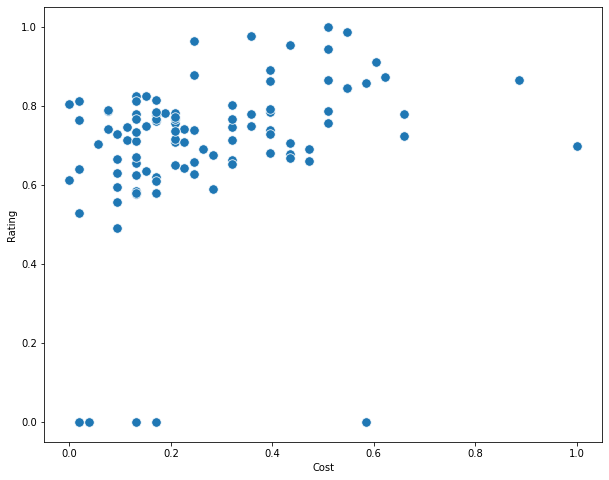

In [210]:
sns.scatterplot(data=scaled_df,y='Rating',x='Cost',s=90)

In [211]:
sse=[]
k_range=range(1,11)
for k in k_range:
  km=KMeans(n_clusters=k)
  km.fit(scaled_df[['Cost','Rating']])
  sse.append(km.inertia_)

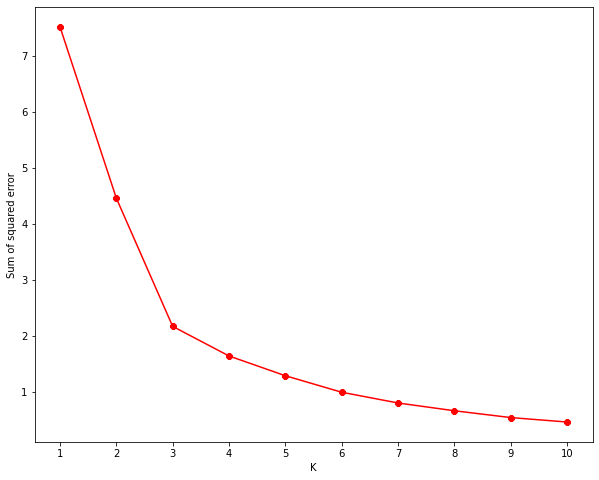

In [212]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.xticks(np.arange(1,11,1))
plt.plot(k_range,sse,marker='8',color='red')


In [213]:
kmeans_df1 = scaled_df.copy()

In [214]:
#fit predict kmeans on 3 clusters
model1 = KMeans(n_clusters=3,random_state= 0)
pred_1 = model1.fit_predict(kmeans_df1[['Cost', 'Rating']])
kmeans_df1["label"] = pred_1

Text(0.5, 1.0, 'Cost vs Average Rating')

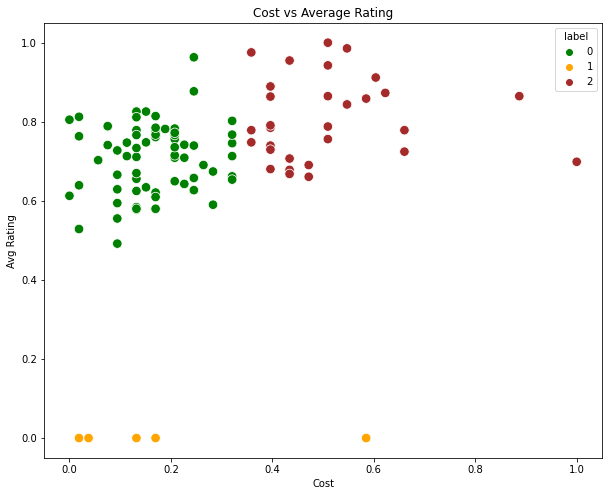

In [215]:
sns.scatterplot(x = 'Cost',y = 'Rating',hue="label", legend='full',data = kmeans_df1,palette=['green','orange','brown']  ,s = 90 )
plt.xlabel('Cost')
plt.ylabel('Avg Rating') 
plt.title('Cost vs Average Rating')

In [216]:
rest_rating['Index'] = list(range(0,104))
rest_rating.set_index(['Index','Name'],inplace=True)
scaled_df['Index'] = list(range(0,104))
scaled_df.set_index(['Index','Name'],inplace=True)

In [217]:
scaled_df

,,Chinese,Continental,Kebab,European,South Indian,North Indian,Biryani,Asian,Mediterranean,Desserts,...,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian,Cost,no of cuisnes,Rating
Index,Name,,,,,,,,,,,,,,,,,,,,,
0,Beyond Flavours,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0.245283,1.0,0.877049
1,Paradise,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0.245283,0.4,0.963115
2,Flechazo,0,0,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0.433962,0.6,0.954918
3,Shah Ghouse Hotel & Restaurant,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0.245283,0.8,0.657787
4,Over The Moon Brew Company,1,1,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0.396226,0.8,0.889344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,IndiBlaze,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.169811,0.2,0.000000
100,Sweet Basket,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.018868,0.2,0.000000
101,Angaara Counts 3,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0.132075,0.4,0.000000


In [259]:
#principal component analysis
from sklearn.decomposition import PCA
#choosing 3 components
pca = PCA(n_components=3)
#fitting pca
pca_result = pca.fit_transform(scaled_df)
#variance ratio
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.19075605 0.1161455  0.07367076]
Cumulative variance explained by 3 principal components: 38.06%


In [219]:
pca_result.shape

(104, 3)

In [220]:
scaled_df

,,Chinese,Continental,Kebab,European,South Indian,North Indian,Biryani,Asian,Mediterranean,Desserts,...,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian,Cost,no of cuisnes,Rating
Index,Name,,,,,,,,,,,,,,,,,,,,,
0,Beyond Flavours,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0.245283,1.0,0.877049
1,Paradise,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0.245283,0.4,0.963115
2,Flechazo,0,0,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0.433962,0.6,0.954918
3,Shah Ghouse Hotel & Restaurant,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0.245283,0.8,0.657787
4,Over The Moon Brew Company,1,1,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0.396226,0.8,0.889344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,IndiBlaze,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.169811,0.2,0.000000
100,Sweet Basket,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.018868,0.2,0.000000
101,Angaara Counts 3,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0.132075,0.4,0.000000


In [221]:
pca_result

array([[-1.00588454,  0.44565538, -0.2710013 ],
       [-0.7957817 , -0.62634032,  0.06660102],
       [ 0.12946121,  0.42822511, -0.167476  ],
       [-0.85902865, -0.70276825,  0.13629291],
       [-0.84619832,  0.76862137,  0.40312429],
       [-0.33263436,  1.02266815,  0.03643842],
       [-0.28729081,  0.54209067, -0.61036613],
       [ 0.68480286, -0.09927596,  0.03999579],
       [-0.77363936, -0.20199515, -0.15341332],
       [ 0.93087558, -0.13413107,  0.02924578],
       [ 0.27622818, -0.23933541, -0.65034345],
       [-0.17055984,  0.20991861, -0.72396401],
       [-0.04930884,  0.25434471,  0.63188412],
       [-0.16912045,  0.47031373, -0.58726244],
       [-0.09634948,  0.19768462, -0.69425906],
       [ 0.9795298 , -0.26185128, -0.11936597],
       [ 0.05633558, -0.07389714, -0.52725658],
       [-0.521289  , -0.38658543,  0.04169869],
       [-0.74345658,  0.35778241,  0.06242999],
       [-0.77357826, -0.71024007,  0.09437128],
       [ 0.06211795, -0.09612405, -0.519

Parameter: {'n_clusters': 2} Score 0.40623160975233424
Parameter: {'n_clusters': 3} Score 0.45099097721261666
Parameter: {'n_clusters': 4} Score 0.48798223363760623
Parameter: {'n_clusters': 5} Score 0.5220060131865882
Parameter: {'n_clusters': 6} Score 0.5374837049173882
Parameter: {'n_clusters': 7} Score 0.5350758343699564
Parameter: {'n_clusters': 8} Score 0.5061123368975379
Parameter: {'n_clusters': 9} Score 0.5254206014213741
Parameter: {'n_clusters': 10} Score 0.5385741276396574


Text(0.5, 0, 'Number of Clusters')

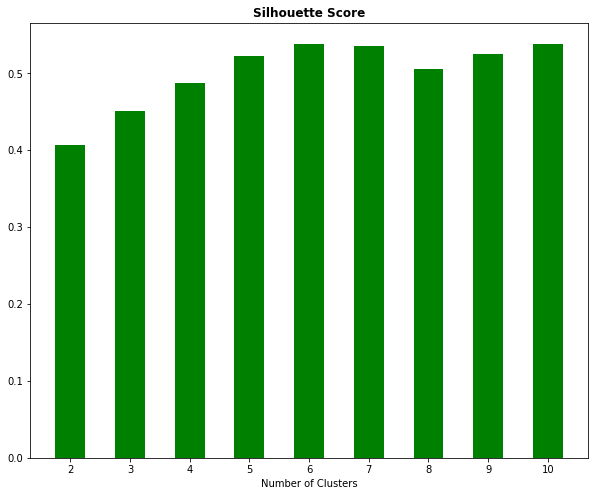

In [222]:
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,11))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans(random_state = 0)     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(pca_result)          # fit model 
    score = silhouette_score(pca_result, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [score]       # store all the scores
    print('Parameter:', p, 'Score', score)
    # check p which has the best score
    if score > best_score:
        best_score = score
        best_grid = p

# plotting 
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='green', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')

In [223]:
# fitting KMeans    
kmeans_pca = KMeans(n_clusters=10,random_state=0)
kmeans_pca.fit(pca_result)

KMeans(n_clusters=10, random_state=0)

In [224]:
rest_rating.index

MultiIndex([(  0,                        'Beyond Flavours'),
            (  1,                               'Paradise'),
            (  2,                               'Flechazo'),
            (  3,         'Shah Ghouse Hotel & Restaurant'),
            (  4,             'Over The Moon Brew Company'),
            (  5,                  'The Fisherman's Wharf'),
            (  6,                                'eat.fit'),
            (  7,               'Shah Ghouse Spl Shawarma'),
            (  8,                            'Hyper Local'),
            (  9,                            'Cream Stone'),
            ...
            ( 94,                             'Desi Bytes'),
            ( 95,                      'Hyderabadi Daawat'),
            ( 96,        'Zega - Sheraton Hyderabad Hotel'),
            ( 97,                               'Triptify'),
            ( 98,                       'Chinese Pavilion'),
            ( 99,                              'IndiBlaze'),
        

In [225]:
rest_rating.index

MultiIndex([(  0,                        'Beyond Flavours'),
            (  1,                               'Paradise'),
            (  2,                               'Flechazo'),
            (  3,         'Shah Ghouse Hotel & Restaurant'),
            (  4,             'Over The Moon Brew Company'),
            (  5,                  'The Fisherman's Wharf'),
            (  6,                                'eat.fit'),
            (  7,               'Shah Ghouse Spl Shawarma'),
            (  8,                            'Hyper Local'),
            (  9,                            'Cream Stone'),
            ...
            ( 94,                             'Desi Bytes'),
            ( 95,                      'Hyderabadi Daawat'),
            ( 96,        'Zega - Sheraton Hyderabad Hotel'),
            ( 97,                               'Triptify'),
            ( 98,                       'Chinese Pavilion'),
            ( 99,                              'IndiBlaze'),
        

In [226]:
kmeans_pca_df = pd.DataFrame(pca_result,columns=['PC1','PC2','PC3'],index=scaled_df.index)
pred_pca = kmeans_pca.fit_predict(pca_result)
kmeans_pca_df ["label"] = pred_pca

In [227]:
pred_pca

array([6, 1, 2, 1, 6, 3, 2, 8, 9, 8, 7, 7, 4, 2, 7, 8, 7, 9, 6, 1, 7, 2,
       8, 8, 6, 0, 6, 7, 8, 8, 9, 9, 7, 2, 1, 1, 9, 3, 0, 3, 8, 8, 8, 9,
       1, 9, 5, 9, 9, 2, 1, 1, 3, 0, 8, 3, 9, 8, 8, 6, 2, 9, 5, 9, 9, 1,
       7, 2, 0, 5, 7, 8, 8, 8, 7, 8, 6, 7, 9, 7, 9, 1, 8, 1, 8, 8, 8, 8,
       8, 0, 3, 3, 8, 8, 9, 4, 0, 7, 4, 8, 8, 1, 8, 5], dtype=int32)

In [228]:
kmeans_pca_df 

,,PC1,PC2,PC3,label
Index,Name,,,,
0,Beyond Flavours,-1.005885,0.445655,-0.271001,6
1,Paradise,-0.795782,-0.626340,0.066601,1
2,Flechazo,0.129461,0.428225,-0.167476,2
3,Shah Ghouse Hotel & Restaurant,-0.859029,-0.702768,0.136293,1
4,Over The Moon Brew Company,-0.846198,0.768621,0.403124,6
...,...,...,...,...,...
99,IndiBlaze,0.906859,-0.269048,-0.050281,8
100,Sweet Basket,0.777040,-0.232494,0.127199,8
101,Angaara Counts 3,-0.764985,-0.765754,0.143641,1


In [229]:
rest_rating

,,Cost,Chinese,Continental,Kebab,European,South Indian,North Indian,Biryani,Asian,Mediterranean,...,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian,no of cuisnes,Rating
Index,Name,,,,,,,,,,,,,,,,,,,,,
0,Beyond Flavours,800.0,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,6,4.28
1,Paradise,800.0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,3,4.70
2,Flechazo,1300.0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,4,4.66
3,Shah Ghouse Hotel & Restaurant,800.0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,5,3.21
4,Over The Moon Brew Company,1200.0,1,1,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,5,4.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,IndiBlaze,600.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0.00
100,Sweet Basket,200.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,0.00
101,Angaara Counts 3,500.0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,3,0.00


In [230]:
rest_rating=rest_rating.join(kmeans_pca_df ['label'])

In [231]:
rest_rating['label'].value_counts()

8    28
9    16
7    13
1    12
2     8
6     7
3     7
0     6
5     4
4     3
Name: label, dtype: int64

In [232]:
def cluster_cuisines(df,cluster):
  pop_cuisines_df = pd.DataFrame()
  pop_cuisines_df['Cuisines'] = cuis_dict.keys()
  pop_cuisines_df['Total Restaurants'] = [df[i].sum() for i in cuis_dict.keys()]
  #visualizing cuisines
  sns.barplot(x='Total Restaurants', y='Cuisines',data=pop_cuisines_df)
  plt.title(f'The Most Popular Cuisines in {cluster}',size=10)

In [233]:
rest_rating.loc[rest_rating['label']==0].columns


Index(['Cost', 'Chinese', 'Continental', 'Kebab', 'European', 'South Indian',
       'North Indian', 'Biryani', 'Asian', 'Mediterranean', 'Desserts',
       'Seafood', 'Beverages', 'Goan', 'Healthy Food', 'Lebanese', 'American',
       'Ice Cream', 'Street Food', 'Fast Food', 'BBQ', 'Italian',
       'Finger Food', 'Burger', 'Japanese', 'Salad', 'Sushi', 'Mexican',
       'Mughlai', 'Bakery', 'Juices', 'Arabian', 'Andhra', 'Hyderabadi',
       'Cafe', 'Spanish', 'Wraps', 'Thai', 'Indonesian', 'Modern Indian',
       'Momos', 'Pizza', 'North Eastern', 'Mithai', 'Malaysian',
       'no of cuisnes', 'Rating', 'label'],
      dtype='object')

In [234]:
rest_rating[rest_rating['label']==0]

,,Cost,Chinese,Continental,Kebab,European,South Indian,North Indian,Biryani,Asian,Mediterranean,...,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian,no of cuisnes,Rating,label
Index,Name,,,,,,,,,,,,,,,,,,,,,
25,Tiki Shack,1000.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3.480000,0
38,Deli 9 Bistro,700.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,3.820000,0
53,Asian Meal Box,200.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,2.580000,0
68,The Indi Grill,1500.0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,3,4.600000,0
89,Arena Eleven,1600.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4.117647,0
96,Zega - Sheraton Hyderabad Hotel,1750.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,2,4.450000,0


In [235]:
rest_rating.loc[rest_rating['label']==0,['Cost','no of cuisnes','Rating','label']].describe()

,Cost,no of cuisnes,Rating,label
count,6.000000,6.000000,6.000000,6.0
mean,1125.000000,1.833333,3.841275,0.0
std,601.456565,0.983192,0.740861,0.0
min,200.000000,1.000000,2.580000,0.0
25%,775.000000,1.000000,3.565000,0.0
50%,1250.000000,1.500000,3.968824,0.0
75%,1575.000000,2.750000,4.366912,0.0
max,1750.000000,3.000000,4.600000,0.0


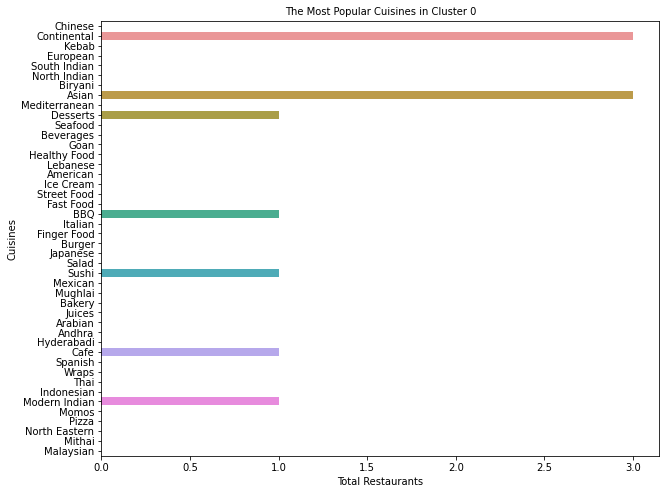

In [236]:
cluster_cuisines(rest_rating[rest_rating['label']==0],'Cluster 0')

In [237]:
rest_rating.loc[rest_rating['label']==1,['Cost','no of cuisnes','Rating','label']].describe()

,Cost,no of cuisnes,Rating,label
count,12.000000,12.000000,12.000000,12.0
mean,666.666667,3.750000,3.137197,1.0
std,154.233196,0.866025,1.103788,0.0
min,400.000000,3.000000,0.000000,1.0
25%,500.000000,3.000000,3.114773,1.0
50%,700.000000,3.500000,3.250000,1.0
75%,762.500000,4.250000,3.540000,1.0
max,900.000000,5.000000,4.700000,1.0


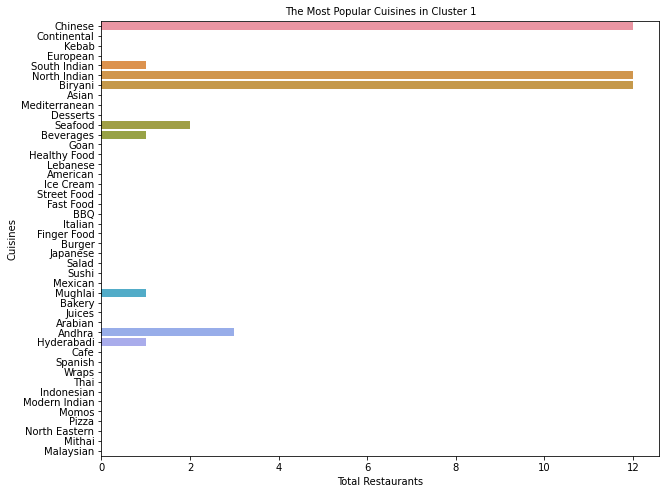

In [238]:
cluster_cuisines(rest_rating[rest_rating['label']==1],'Cluster 1')

In [239]:
rest_rating.loc[rest_rating['label']==2,['Cost','no of cuisnes','Rating','label']].describe()

,Cost,no of cuisnes,Rating,label
count,8.000000,8.000000,8.000000,8.0
mean,1275.000000,3.625000,3.838125,2.0
std,455.913526,0.916125,0.484495,0.0
min,500.000000,2.000000,3.200000,2.0
25%,1100.000000,3.000000,3.513750,2.0
50%,1300.000000,4.000000,3.727500,2.0
75%,1550.000000,4.000000,4.196250,2.0
max,1900.000000,5.000000,4.660000,2.0


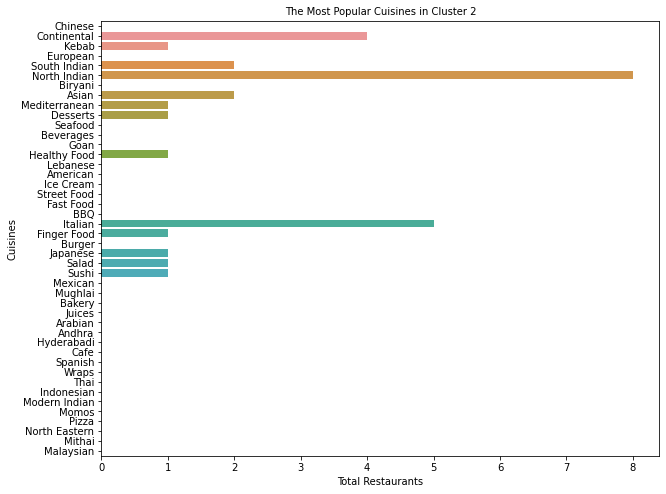

In [240]:
cluster_cuisines(rest_rating[rest_rating['label']==2],'Cluster 2')

In [241]:
rest_rating.loc[rest_rating['label']==3,['Cost','no of cuisnes','Rating','label']].describe()

,Cost,no of cuisnes,Rating,label
count,7.000000,7.000000,7.000000,7.0
mean,1742.857143,4.142857,3.838571,3.0
std,662.965919,0.690066,0.402800,0.0
min,1200.000000,3.000000,3.320000,3.0
25%,1200.000000,4.000000,3.510000,3.0
50%,1500.000000,4.000000,3.830000,3.0
75%,2150.000000,4.500000,4.220000,3.0
max,2800.000000,5.000000,4.260000,3.0


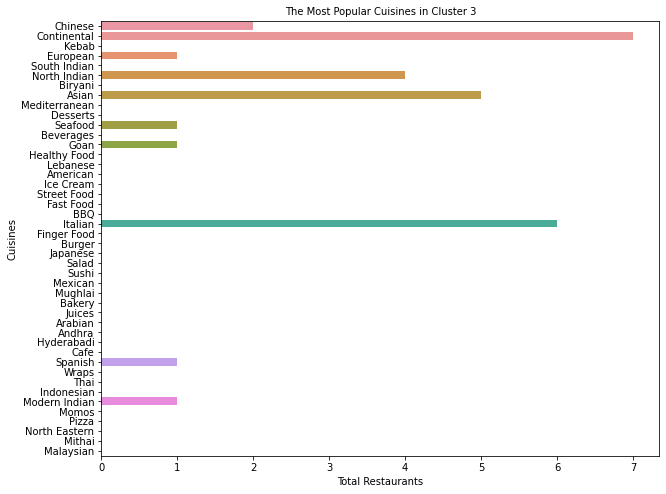

In [242]:
cluster_cuisines(rest_rating[rest_rating['label']==3],'Cluster 3')

In [243]:
rest_rating.loc[rest_rating['label']==4,['Cost','no of cuisnes','Rating','label']].describe()

,Cost,no of cuisnes,Rating,label
count,3.000000,3.000000,3.000000,3.0
mean,783.333333,2.666667,3.731667,4.0
std,202.072594,0.577350,0.105633,0.0
min,600.000000,2.000000,3.620000,4.0
25%,675.000000,2.500000,3.682500,4.0
50%,750.000000,3.000000,3.745000,4.0
75%,875.000000,3.000000,3.787500,4.0
max,1000.000000,3.000000,3.830000,4.0


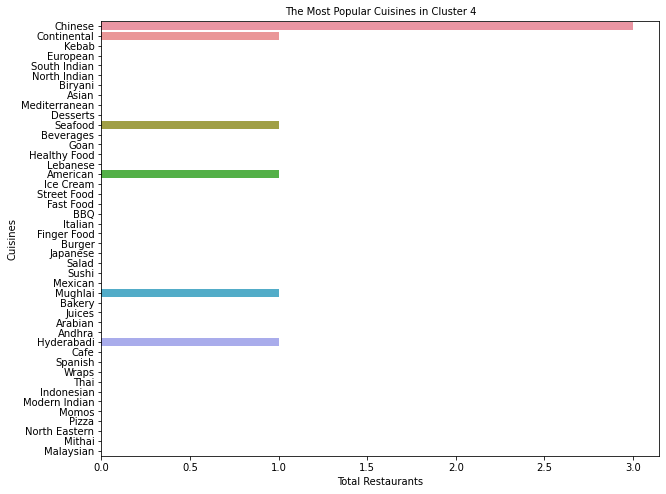

In [244]:
cluster_cuisines(rest_rating[rest_rating['label']==4],'Cluster 4')

In [245]:
rest_rating.loc[rest_rating['label']==5,['Cost','no of cuisnes','Rating','label']].describe()

,Cost,no of cuisnes,Rating,label
count,4.000000,4.000000,4.000000,4.0
mean,1112.500000,4.000000,2.520000,5.0
std,413.067791,0.816497,1.697194,0.0
min,800.000000,3.000000,0.000000,5.0
25%,837.500000,3.750000,2.295000,5.0
50%,975.000000,4.000000,3.215000,5.0
75%,1250.000000,4.250000,3.440000,5.0
max,1700.000000,5.000000,3.650000,5.0


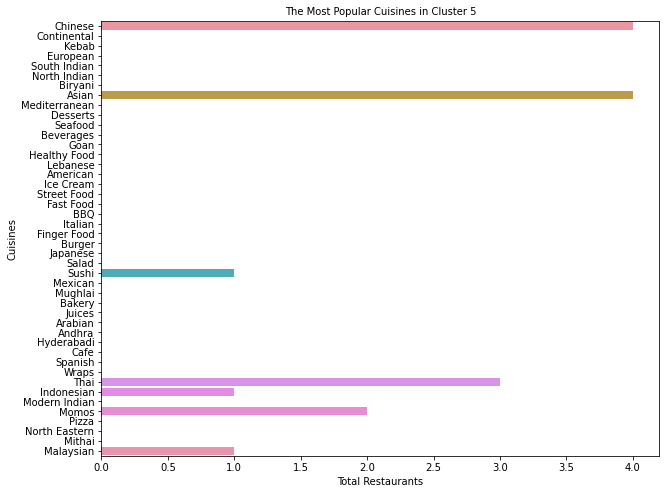

In [246]:
cluster_cuisines(rest_rating[rest_rating['label']==5],'Cluster 5')

In [247]:
rest_rating.loc[rest_rating['label']==6,['Cost','no of cuisnes','Rating','label']].describe()

,Cost,no of cuisnes,Rating,label
count,7.000000,7.000000,7.000000,7.0
mean,1207.142857,4.285714,3.825000,6.0
std,408.685465,1.112697,0.397167,0.0
min,650.000000,3.000000,3.310000,6.0
25%,1000.000000,3.500000,3.585000,6.0
50%,1200.000000,4.000000,3.815000,6.0
75%,1350.000000,5.000000,4.070000,6.0
max,1900.000000,6.000000,4.340000,6.0


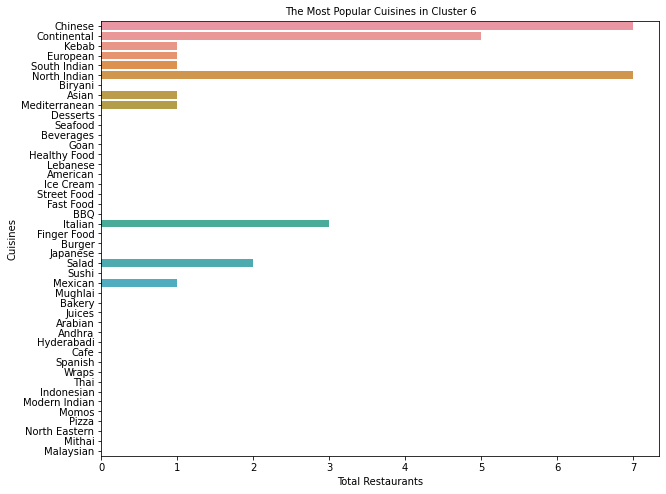

In [248]:
cluster_cuisines(rest_rating[rest_rating['label']==6],'Cluster 6')

In [249]:
rest_rating.loc[rest_rating['label']==7,['Cost','no of cuisnes','Rating','label']].describe()

,Cost,no of cuisnes,Rating,label
count,13.000000,13.000000,13.000000,13.0
mean,900.000000,2.307692,3.736923,7.0
std,428.660705,0.947331,0.587302,0.0
min,400.000000,1.000000,2.880000,7.0
25%,500.000000,2.000000,3.270000,7.0
50%,900.000000,2.000000,3.560000,7.0
75%,1200.000000,3.000000,4.030000,7.0
max,1600.000000,4.000000,4.880000,7.0


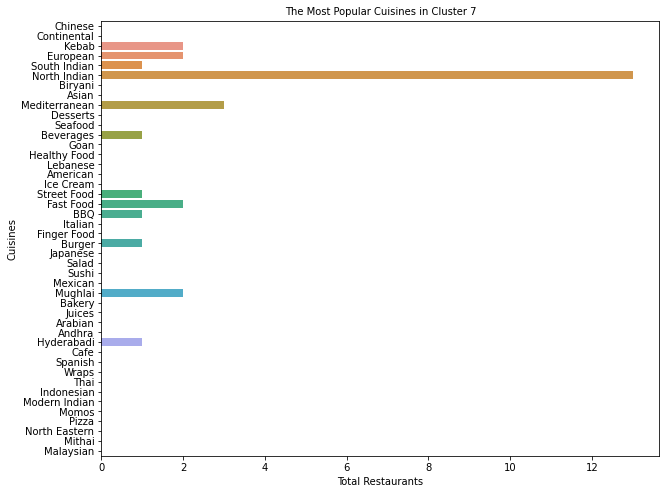

In [250]:
cluster_cuisines(rest_rating[rest_rating['label']==7],'Cluster 7')

In [251]:
rest_rating.loc[rest_rating['label']==8,['Cost','no of cuisnes','Rating','label']].describe()

,Cost,no of cuisnes,Rating,label
count,28.000000,28.000000,28.000000,28.0
mean,489.285714,2.178571,3.175364,8.0
std,295.446035,0.944911,1.207520,0.0
min,150.000000,1.000000,0.000000,8.0
25%,287.500000,2.000000,3.020000,8.0
50%,500.000000,2.000000,3.603081,8.0
75%,600.000000,3.000000,3.846250,8.0
max,1600.000000,5.000000,4.810000,8.0


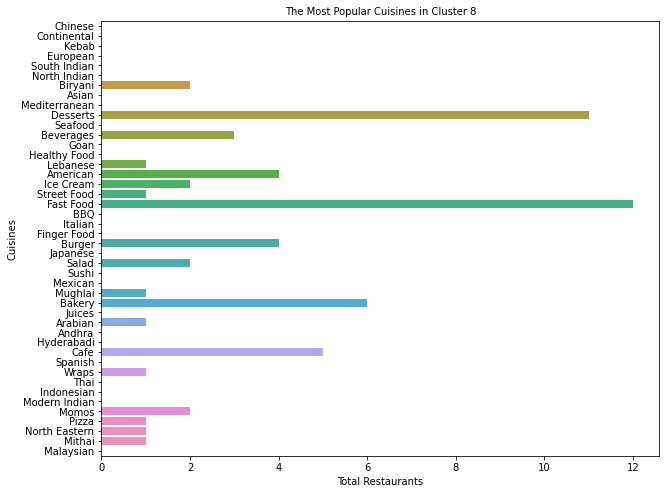

In [252]:
cluster_cuisines(rest_rating[rest_rating['label']==8],'Cluster 8')

In [253]:
rest_rating.loc[rest_rating['label']==9,['Cost','no of cuisnes','Rating','label']].describe()

,Cost,no of cuisnes,Rating,label
count,16.000000,16.000000,16.000000,16.0
mean,734.375000,3.187500,3.316241,9.0
std,346.755798,1.046821,0.445354,0.0
min,400.000000,2.000000,2.400000,9.0
25%,500.000000,2.000000,2.956250,9.0
50%,600.000000,3.000000,3.345000,9.0
75%,1000.000000,4.000000,3.657348,9.0
max,1500.000000,5.000000,4.030000,9.0


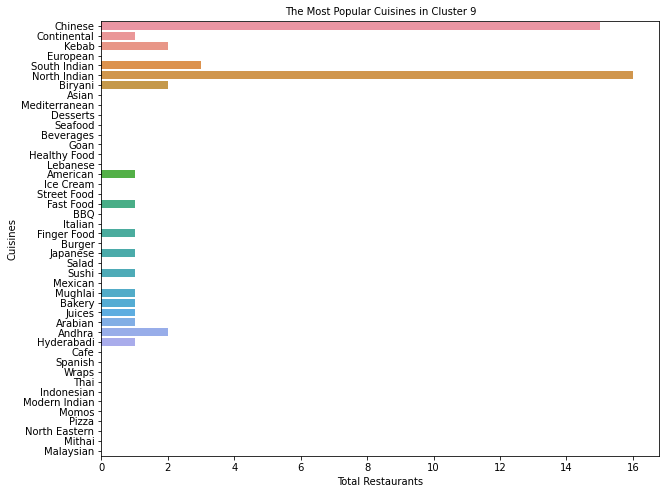

In [254]:
cluster_cuisines(rest_rating[rest_rating['label']==9],'Cluster 9')

In [260]:
df1.head(1)

,Restaurant,Reviewer,Review,Rating,Pictures,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,1,2


In [261]:
sen_df=df1.copy()

In [265]:
sen_df['sentiment']=sen_df['Rating'].apply(lambda rating:1 if rating >3 else 0)

In [266]:
sen_df['sentiment']

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    1
9997    0
9998    1
9999    1
Name: sentiment, Length: 9954, dtype: int64

Text(0.5, 1.0, 'Number of Positive and Negative Sentiments')

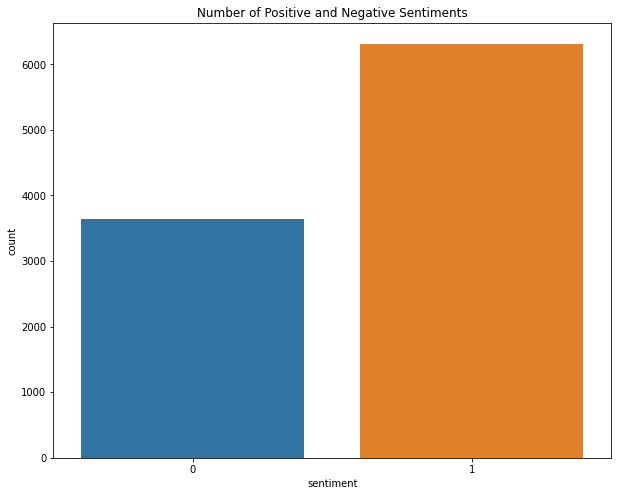

In [267]:
sns.countplot(x=sen_df['sentiment'])
plt.title('Number of Positive and Negative Sentiments',size=12)

In [268]:
#train test split
X = sen_df['Review']
y = sen_df['sentiment']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2)

In [270]:
X_train

5651    Breakfast buffet is always a surprise, with va...
4915    Good thali spread for Ugadi. The taste and ove...
1644    Was served very bad quality of chicken, even f...
897     So quit place nice food butter chicken momos m...
222     I was there on the Mother’s Day and food was a...
                              ...                        
9181    Stayed at Radisson Hyderabad and got to experi...
7361    The coffee was really nice. I ordered Cafe Lat...
9468    Love the donuts. Fresh. Well baked and just yu...
6291      expected better....too much raw spices used....
2650    Pathetic plac, I would never suggest anyone to...
Name: Review, Length: 7963, dtype: object

In [271]:
#import tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [275]:
#import logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced',random_state=0)
lr.fit(X_train_vec, y_train)
lr_score = lr.score(X_test_vec, y_test)
print("Results for Logistic Regression")
print(lr_score)
y_pred_lr = lr.predict(X_test_vec)
#Confusion matrix
from sklearn.metrics import *
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)
#evaluation
print(classification_report(y_test,y_pred_lr))

Results for Logistic Regression
0.8920140632847815
[[ 654   74]
 [ 141 1122]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       728
           1       0.94      0.89      0.91      1263

    accuracy                           0.89      1991
   macro avg       0.88      0.89      0.89      1991
weighted avg       0.90      0.89      0.89      1991



In [274]:
#import
from sklearn.ensemble import RandomForestClassifier
#fitting
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train_vec, y_train)
rf_score = rf.score(X_test_vec, y_test)
print("Results for Random Forest")
print(rf_score)
y_pred_rf = rf.predict(X_test_vec)
#Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
#report
print(classification_report(y_test,y_pred_rf))

Results for Random Forest
0.886991461577097
[[ 571  157]
 [  68 1195]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.84       728
           1       0.88      0.95      0.91      1263

    accuracy                           0.89      1991
   macro avg       0.89      0.87      0.87      1991
weighted avg       0.89      0.89      0.89      1991

